In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 49 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,"28 days, 1 hour and 2 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_b6b215
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.382 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
data_path = "train_data__df2catencode_ultimate.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df = df.drop('C1')
df = df.drop('Visitors_with_Patient')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
df

Hospital_code,Bed_Grade,Severity_of_Illness,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,55,31.9855,31.9855,31.9855,5,50
2,2,3,55,18.4928,31.9855,31.9855,45,50
10,2,3,55,31.9855,38.4928,38.4928,35,50
26,2,3,55,27.3285,18.4928,37.3285,45,50
26,2,3,55,31.7464,37.3285,39.2464,45,50
23,2,3,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,55,34.3971,34.3971,18.4928,5,50
23,3,3,55,29.4976,31.9855,36.1643,45,53.2079
1,4,3,55,31.9855,27.3285,37.4265,55,7.81604
10,3,3,55,43.4928,29.4976,39.6232,35,50


In [4]:
df.describe()

Rows:318438
Cols:9

,Hospital_code,Bed_Grade,Severity_of_Illness,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
type,int,int,int,int,real,real,real,int,real
mins,1.0,1.0,1.0,5.0,17.328501414194704,18.39710084851682,9.497584040430686,5.0,7.816040607143563
mean,18.31884071624619,2.625653973457944,1.908462557860556,45.27853145667289,32.87907996529925,32.78353585024367,32.736854319240436,31.985504242584113,50.26050156867248
maxs,32.0,4.0,3.0,95.0,43.49275212129206,43.56943676256436,40.39710084851682,105.0,112.9535469594144
sigma,8.633754885795051,0.8730604938237946,0.6628857004044931,19.585263126066604,1.0316564756930529,4.116346744445846,1.7714040252455794,21.500751611391166,5.7697512884693944
zeros,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0
0,8.0,2.0,3.0,55.0,31.985504242584113,31.985504242584113,31.985504242584113,5.0,50.0
1,2.0,2.0,3.0,55.0,18.492752121292057,31.985504242584113,31.985504242584113,45.0,50.0
2,10.0,2.0,3.0,55.0,31.985504242584113,38.49275212129206,38.49275212129206,35.0,50.0


In [5]:
y = "Stay"
x = df.columns
x.remove(y)

In [ ]:
aml = H2OAutoML(max_runtime_secs = 1000, seed = 1)
#aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████

In [ ]:
lb = aml.leaderboard

In [10]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20230822_123020,19.8308,393.26,14.7741,0.643757,393.26
StackedEnsemble_AllModels_2_AutoML_2_20230822_123020,19.8675,394.716,14.8032,0.645039,394.716
StackedEnsemble_BestOfFamily_4_AutoML_2_20230822_123020,19.8717,394.884,14.8038,0.645183,394.884
StackedEnsemble_AllModels_1_AutoML_2_20230822_123020,19.877,395.094,14.8115,0.645183,395.094
StackedEnsemble_BestOfFamily_3_AutoML_2_20230822_123020,19.8886,395.556,14.8232,0.645626,395.556
StackedEnsemble_BestOfFamily_2_AutoML_2_20230822_123020,19.8968,395.883,14.8301,0.645743,395.883
DRF_1_AutoML_2_20230822_123020,19.9605,398.422,14.9346,0.650846,398.422
XRT_1_AutoML_2_20230822_123020,20.0355,401.423,14.9925,0.65153,401.423
StackedEnsemble_BestOfFamily_1_AutoML_2_20230822_123020,20.108,404.333,14.9497,0.648026,404.333
GBM_1_AutoML_2_20230822_123020,20.1815,407.292,14.9942,0.649516,407.292


model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_2_20230822_123020,15.4948,240.09,11.3732,0.529263,240.09,11027,0.002121,DRF
StackedEnsemble_AllModels_3_AutoML_2_20230822_123020,16.1454,260.673,11.9124,0.544801,260.673,2867,0.013683,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20230822_123020,16.2075,262.684,11.9463,0.546167,262.684,1086,0.014098,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20230822_123020,16.2341,263.546,11.9797,0.547252,263.546,1439,0.007321,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20230822_123020,16.3613,267.691,12.0837,0.550833,267.691,1302,0.034935,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20230822_123020,16.4009,268.989,12.1089,0.551312,268.989,1078,0.013846,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20230822_123020,16.4736,271.381,12.1726,0.553727,271.381,831,0.012149,StackedEnsemble
XRT_1_AutoML_2_20230822_123020,17.1457,293.973,12.6832,0.572643,293.973,7549,0.001681,DRF
XGBoost_1_AutoML_2_20230822_123020,17.5228,307.048,12.9965,nan,307.048,13314,0.00156,XGBoost
XGBoost_grid_1_AutoML_2_20230822_123020_model_2,17.8377,318.183,13.1517,0.587765,318.183,10280,0.001172,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

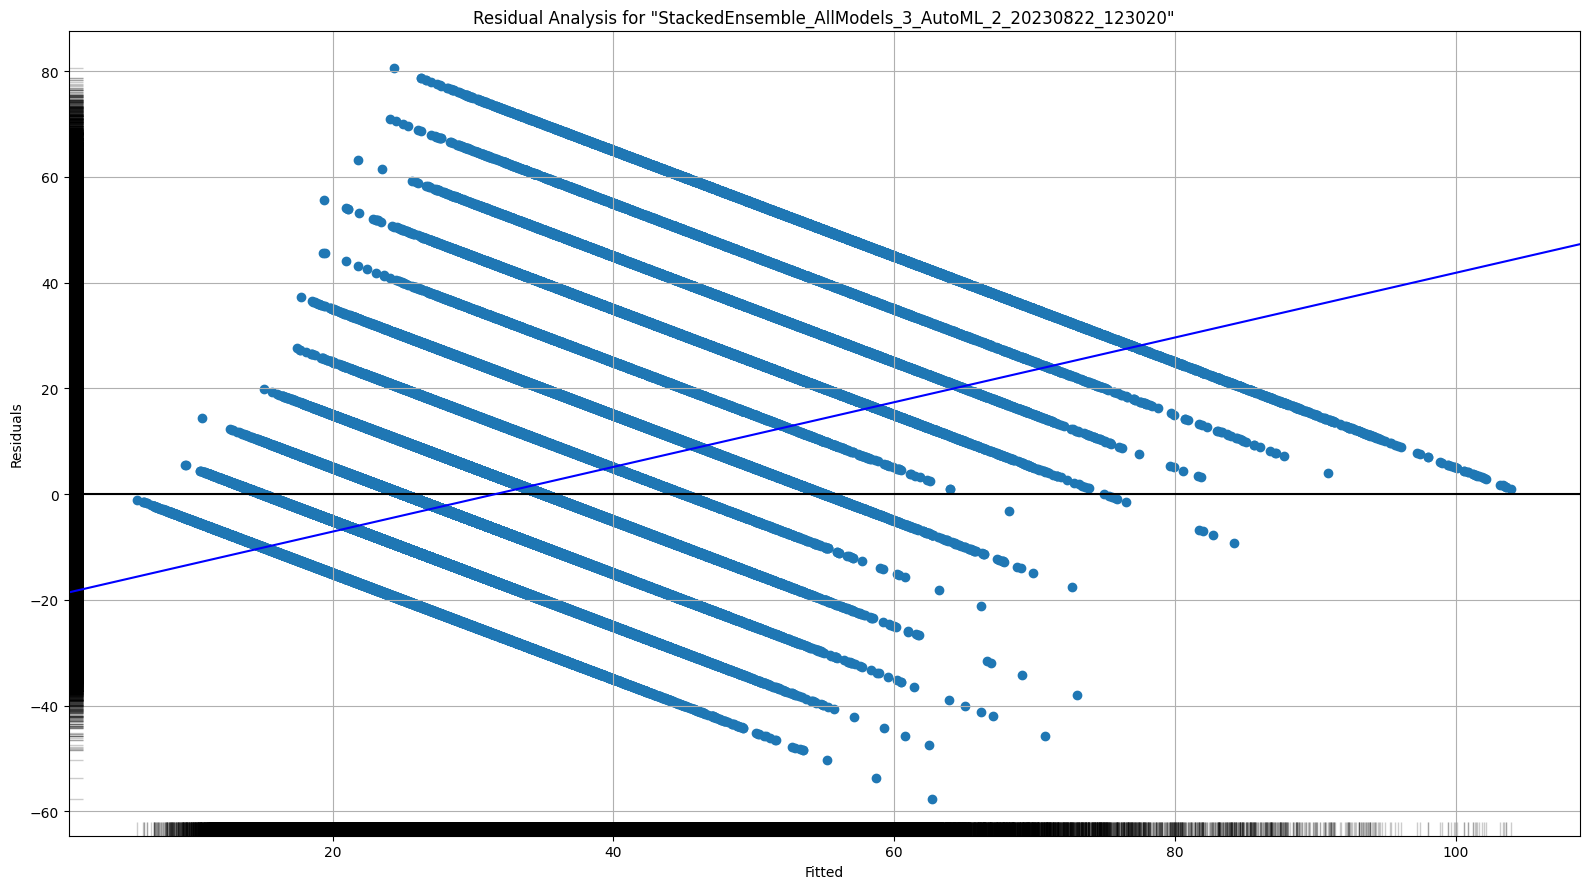

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

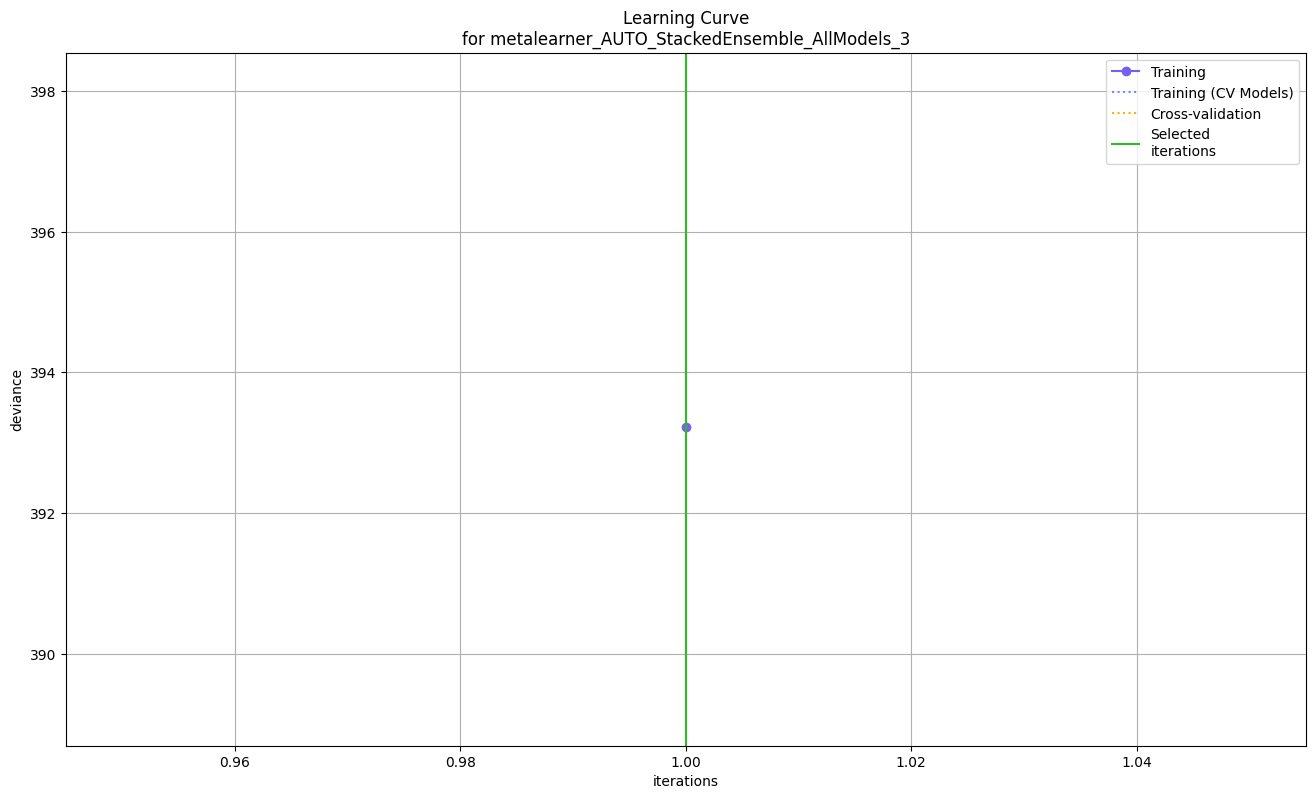

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

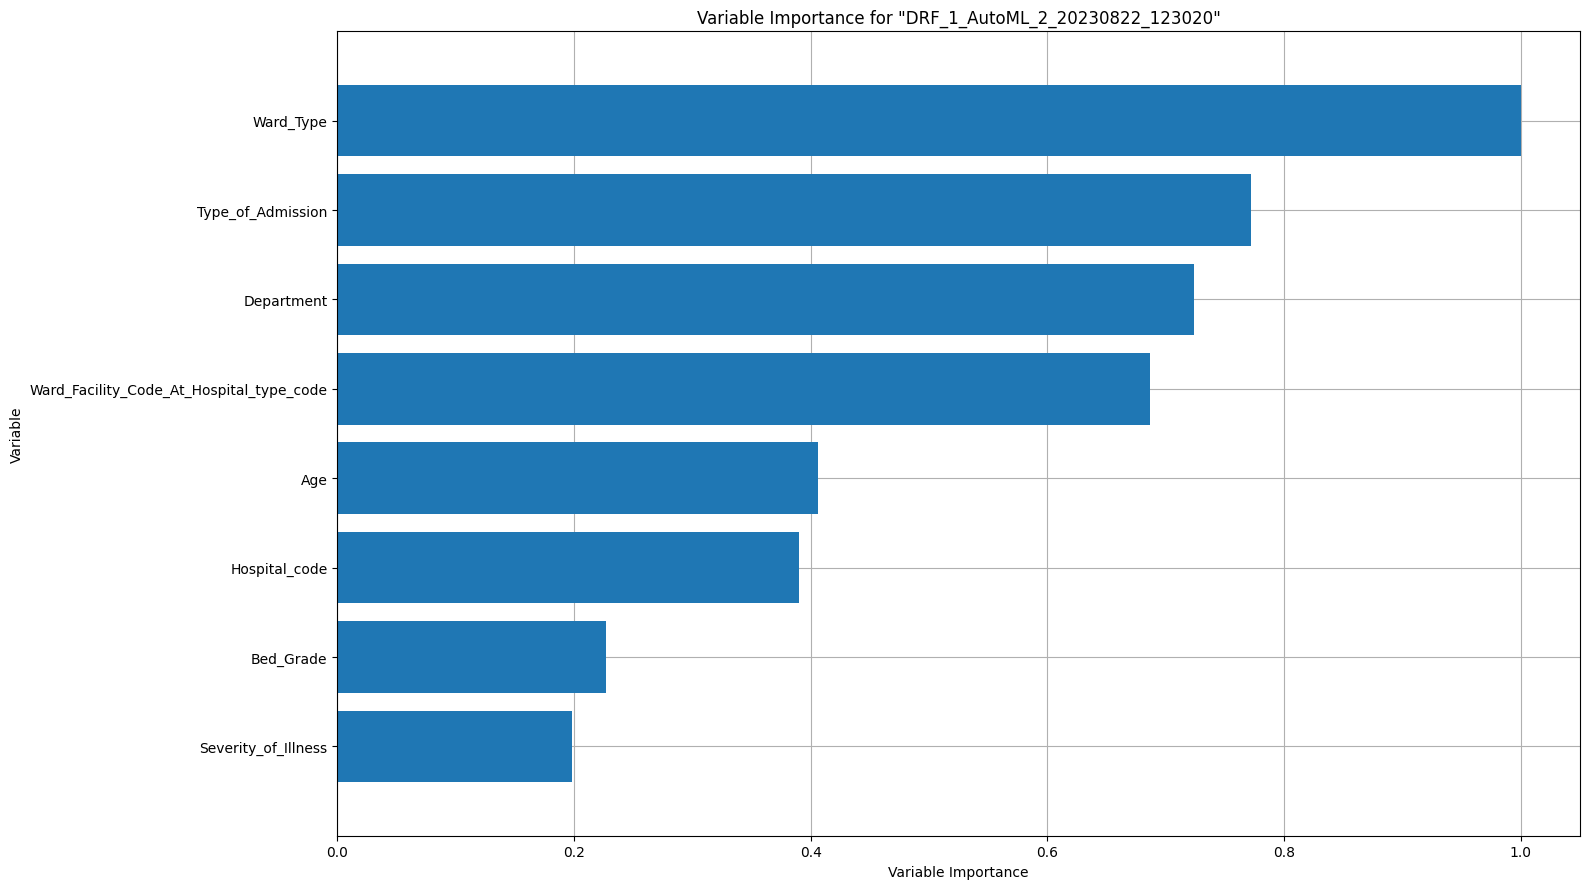

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

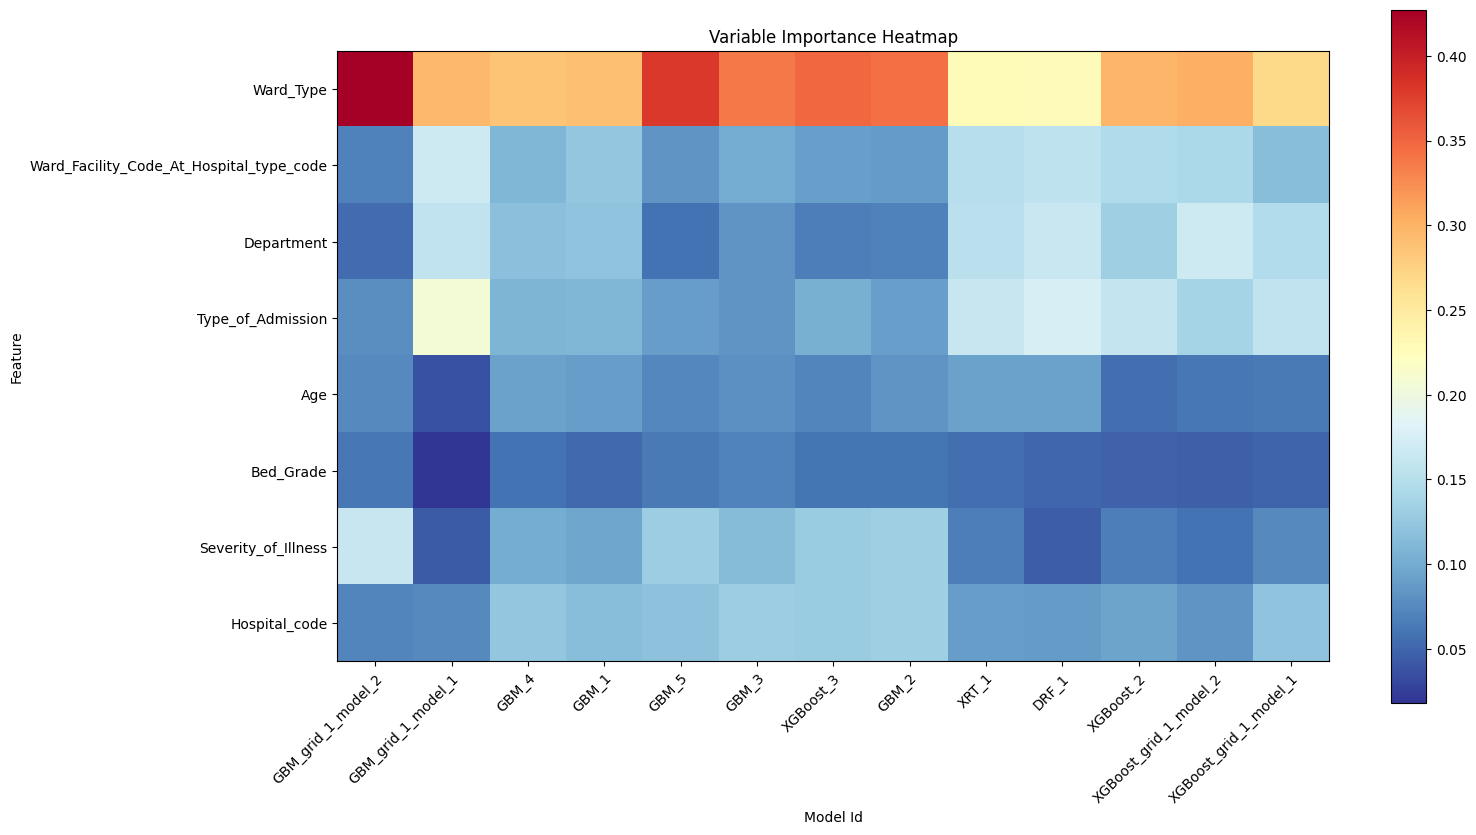

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

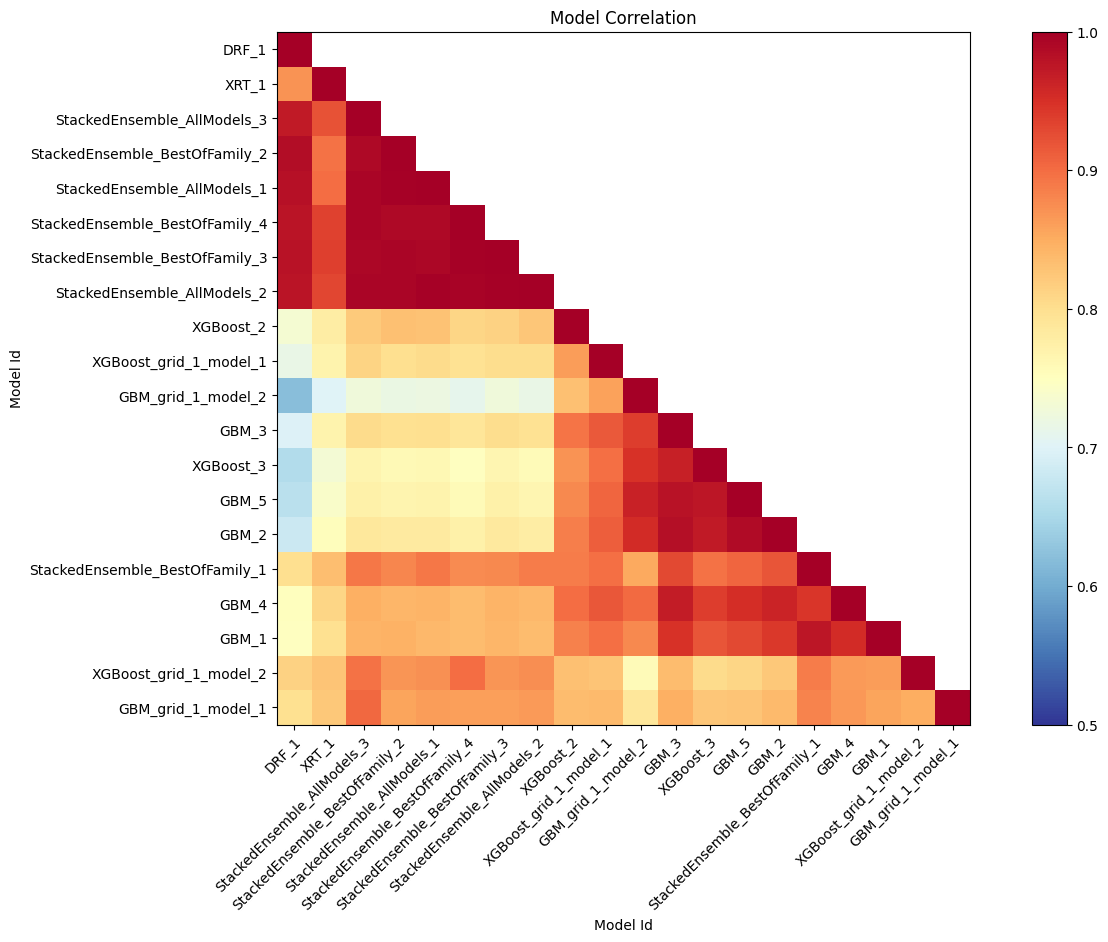

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

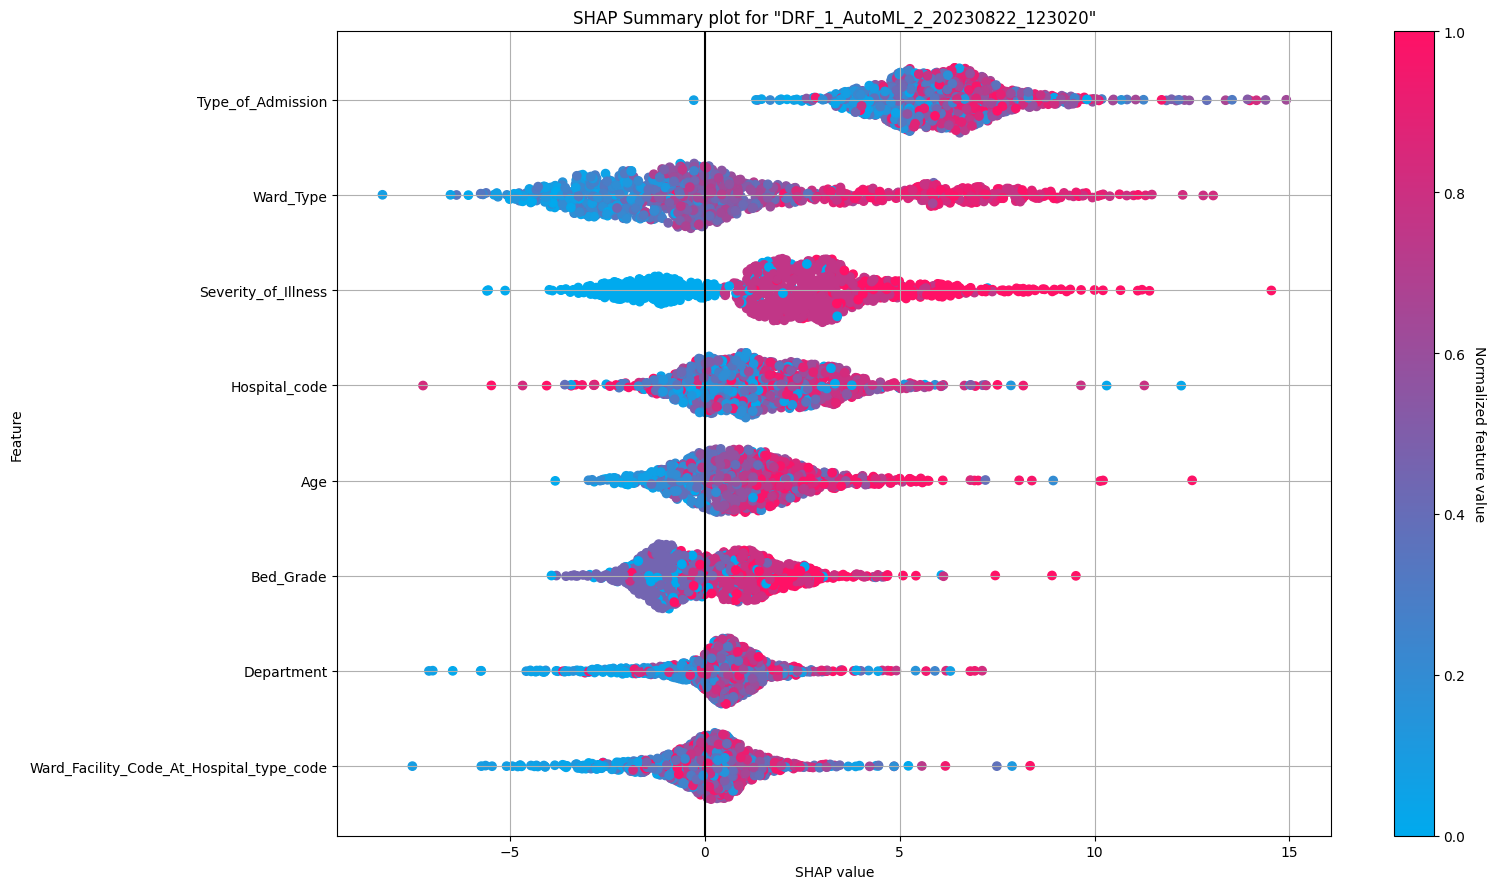

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

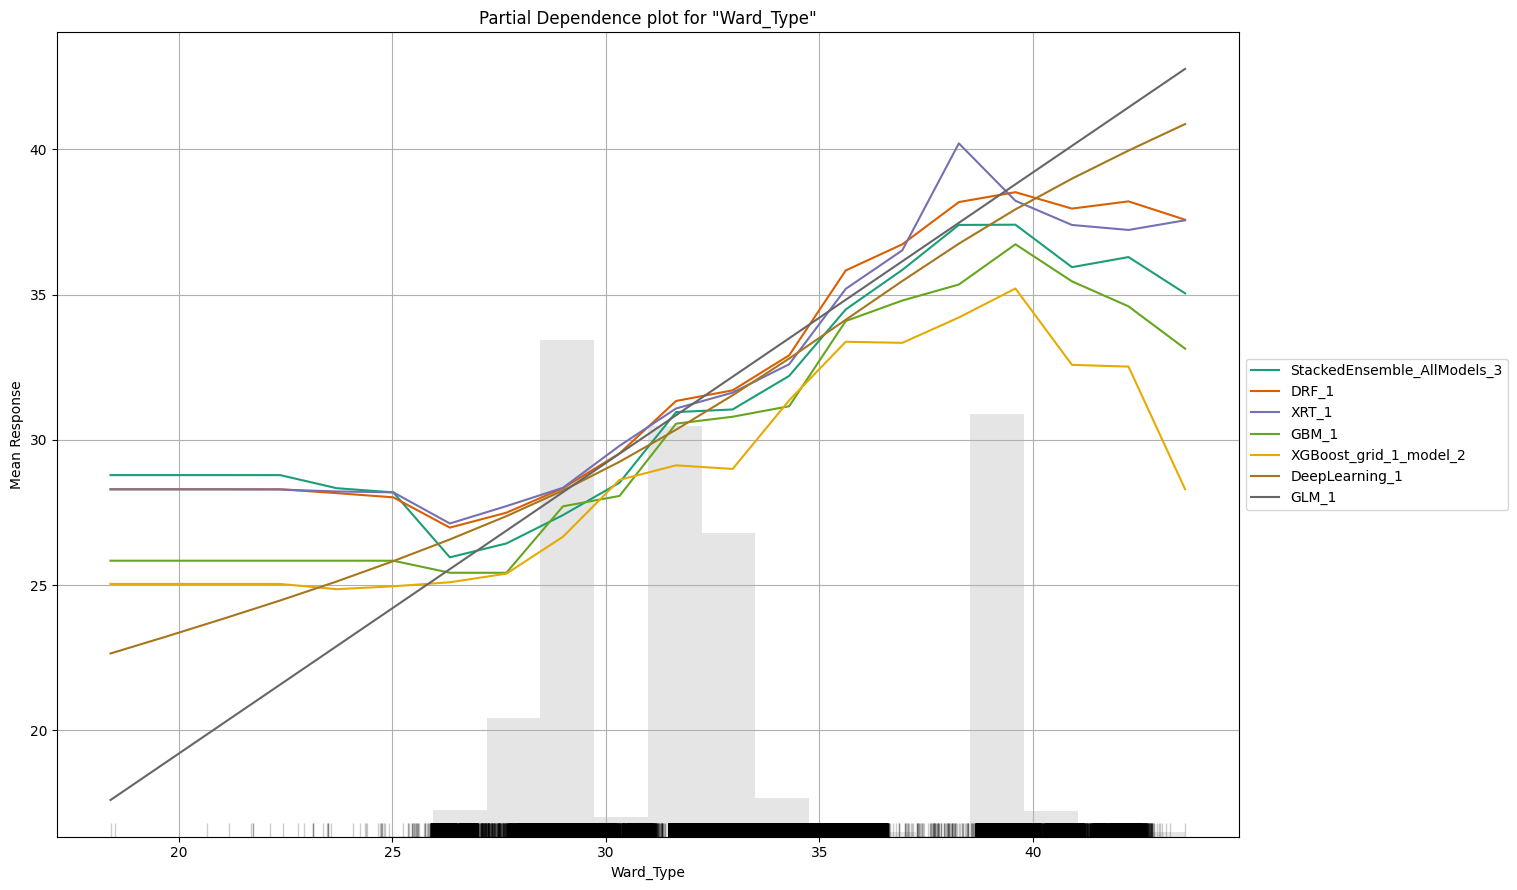

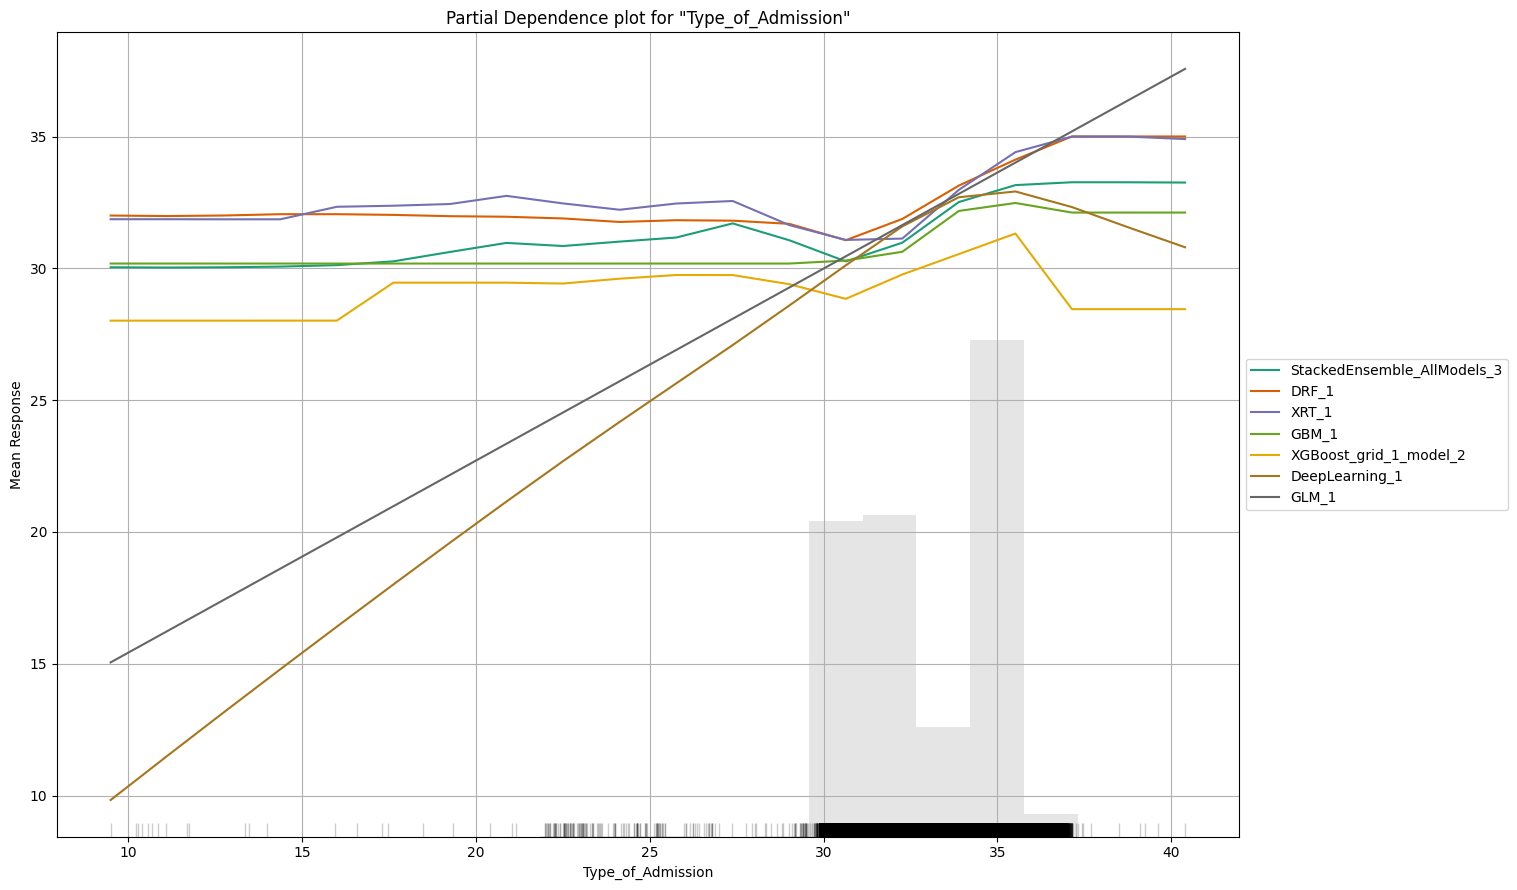

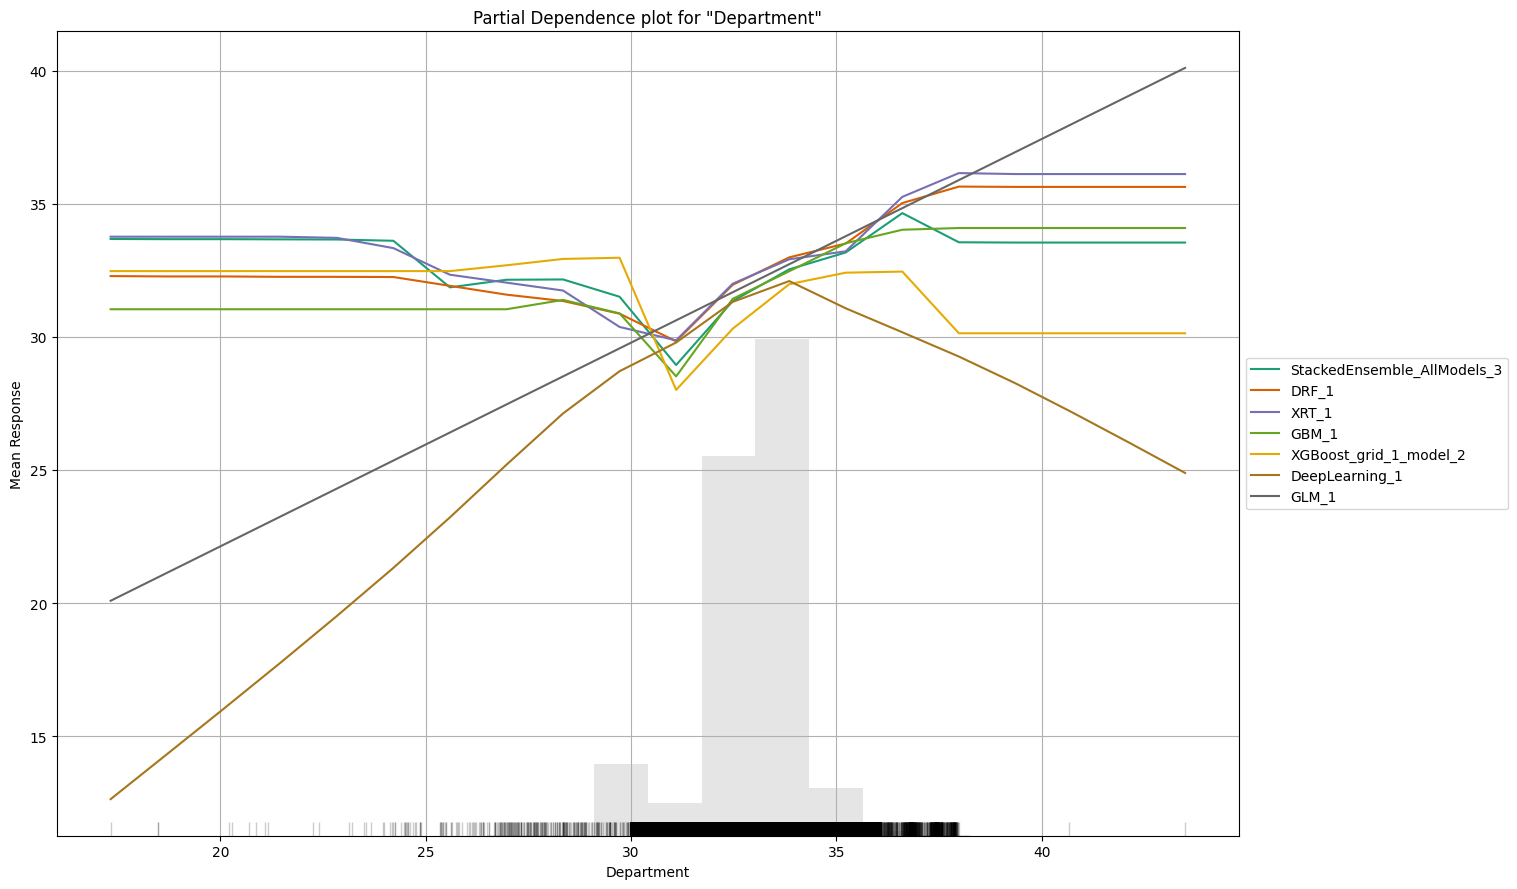

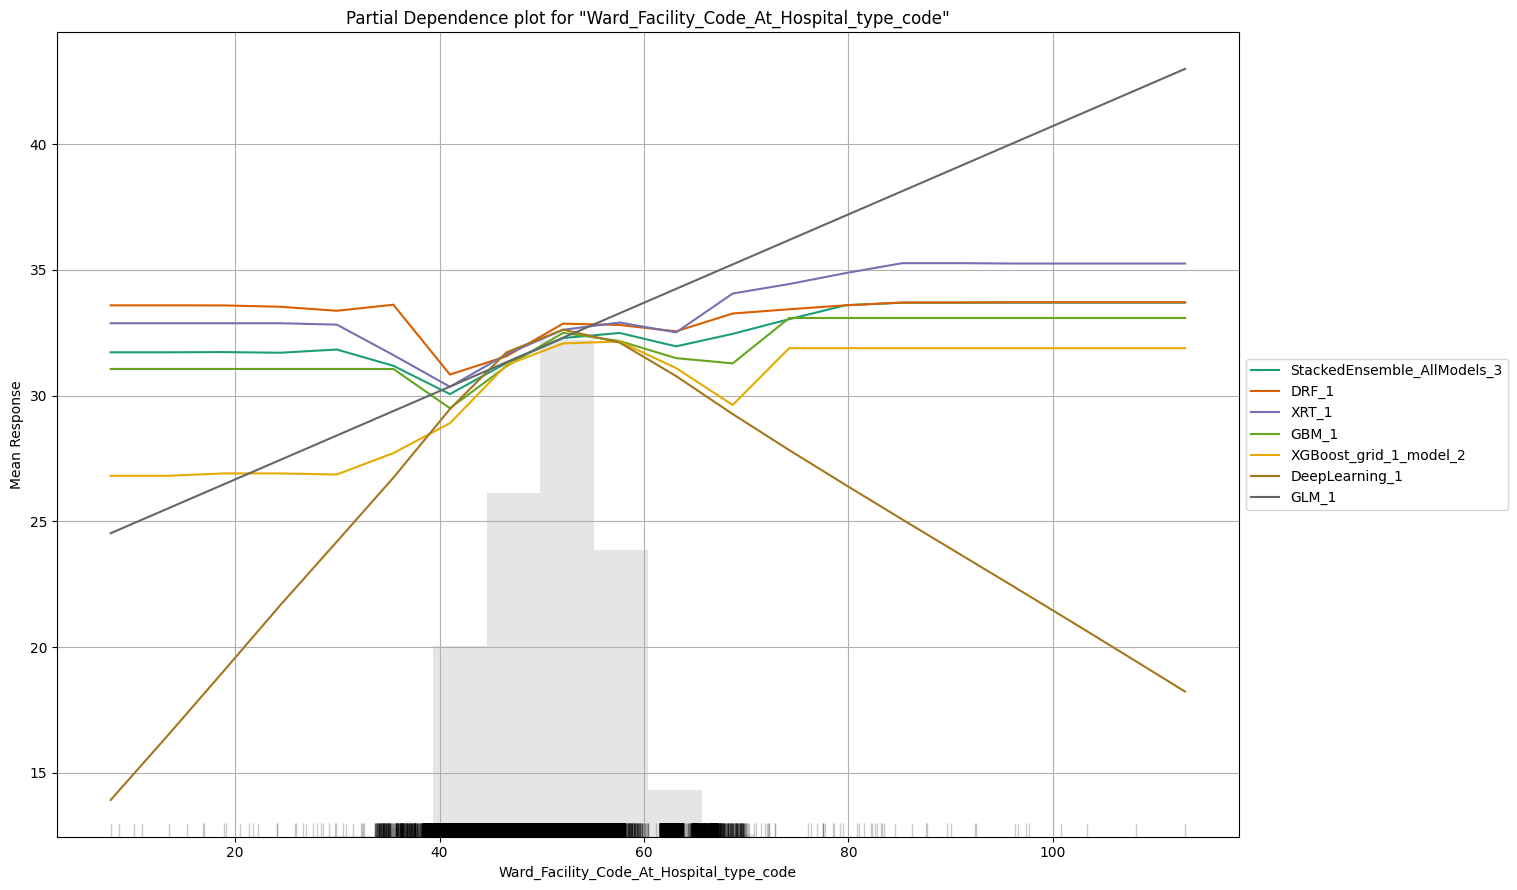

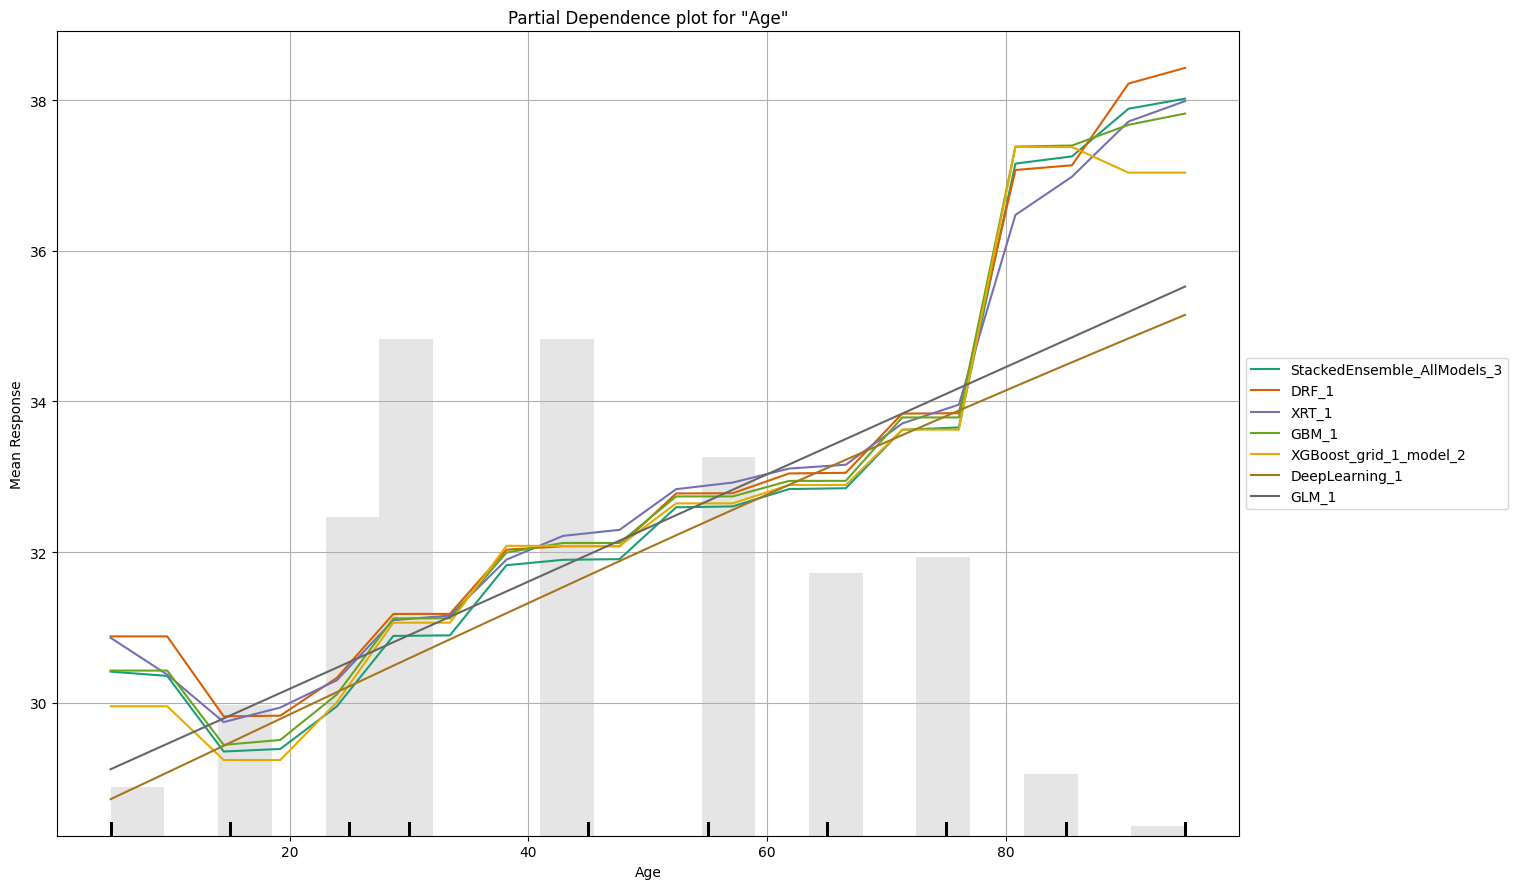

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

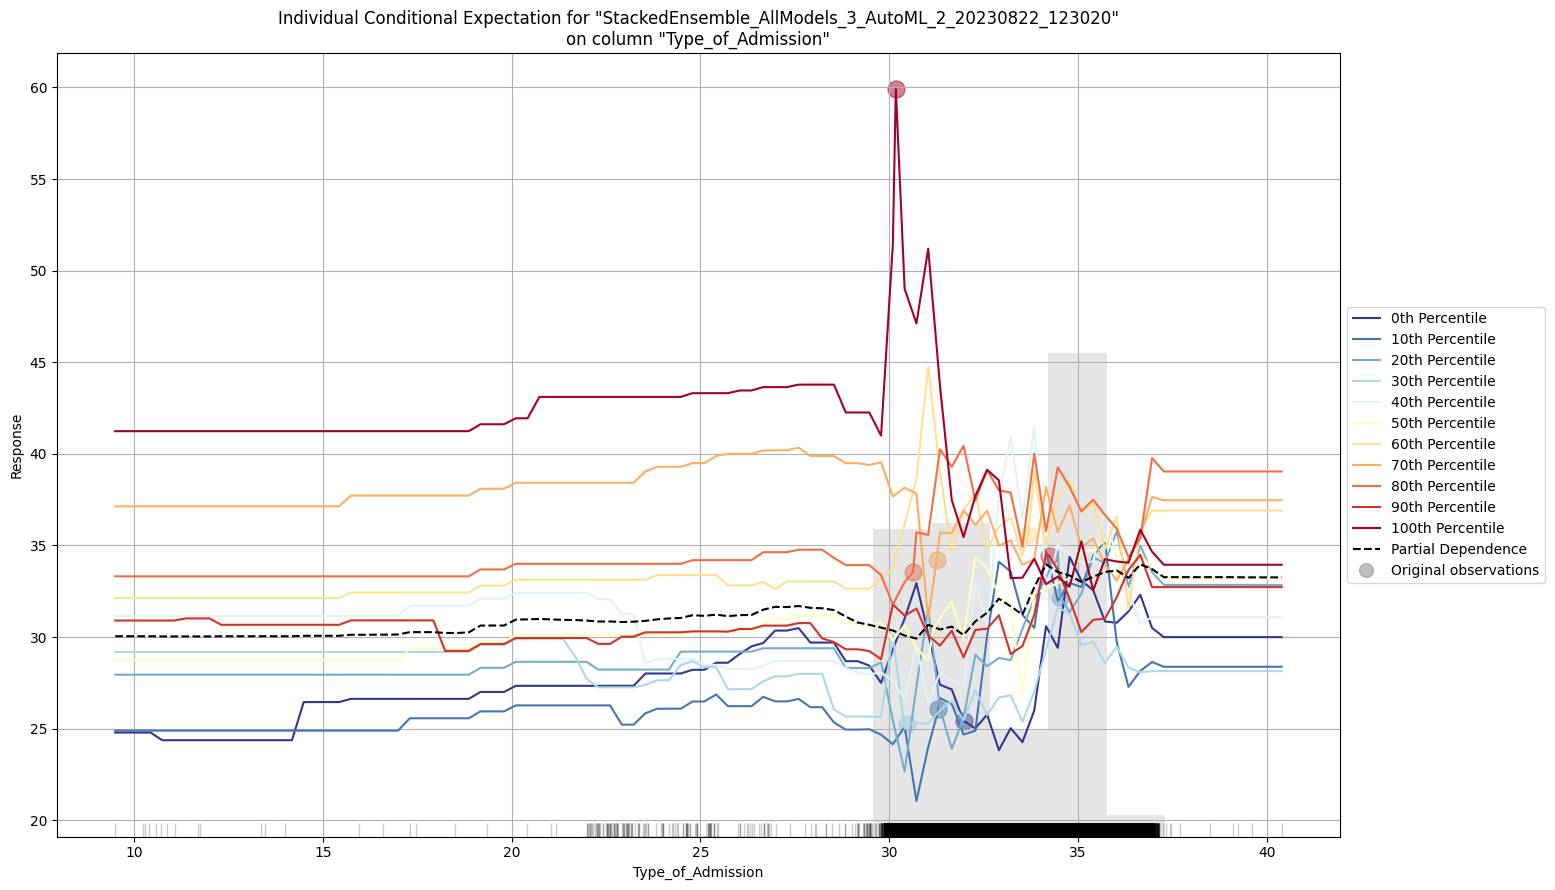

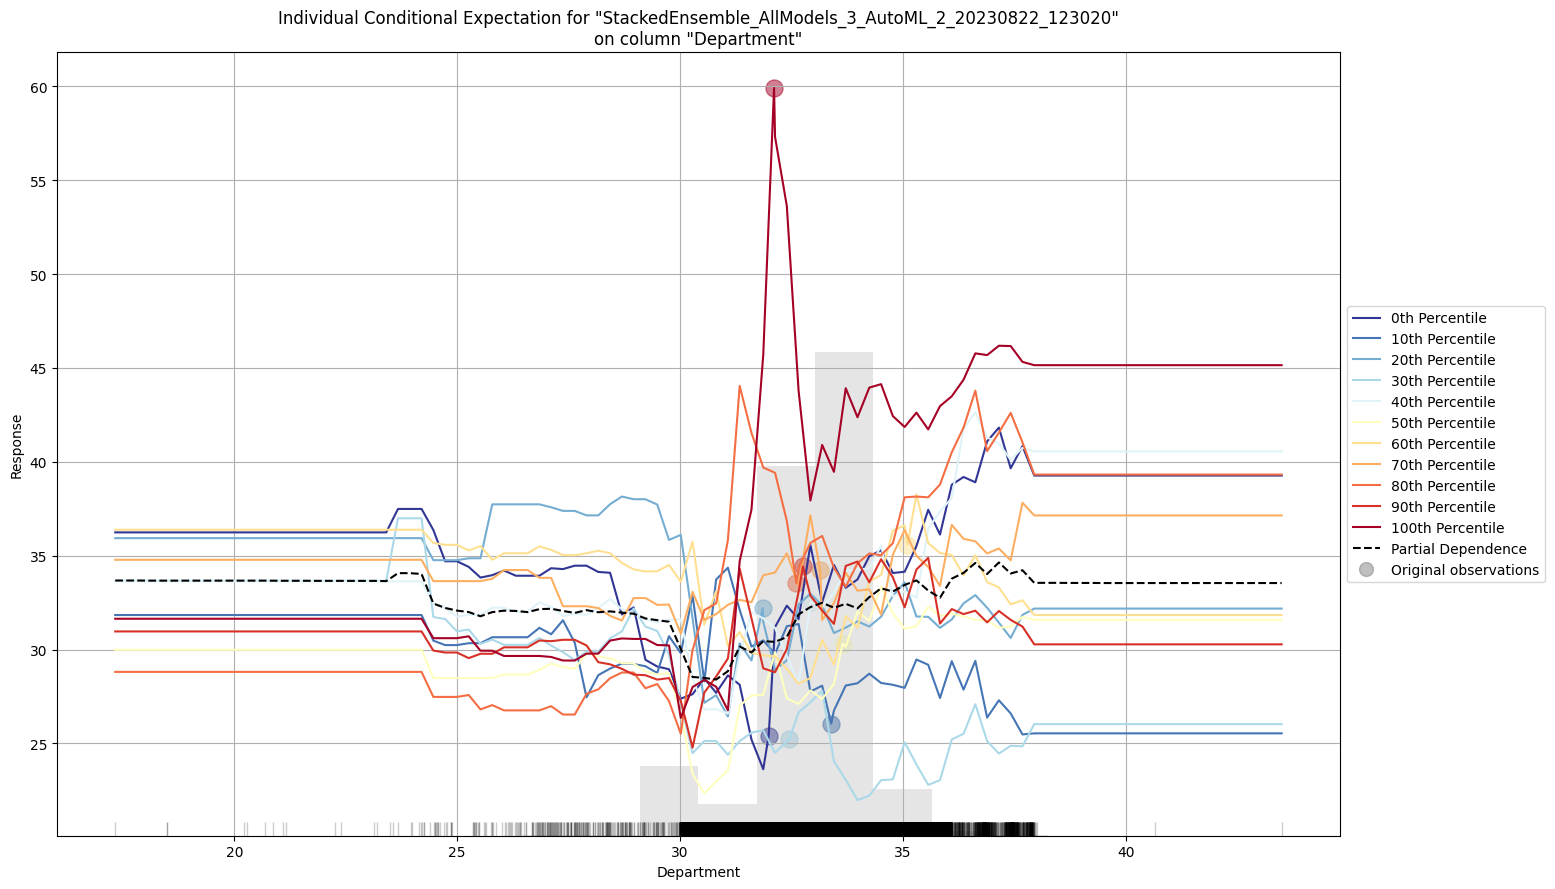

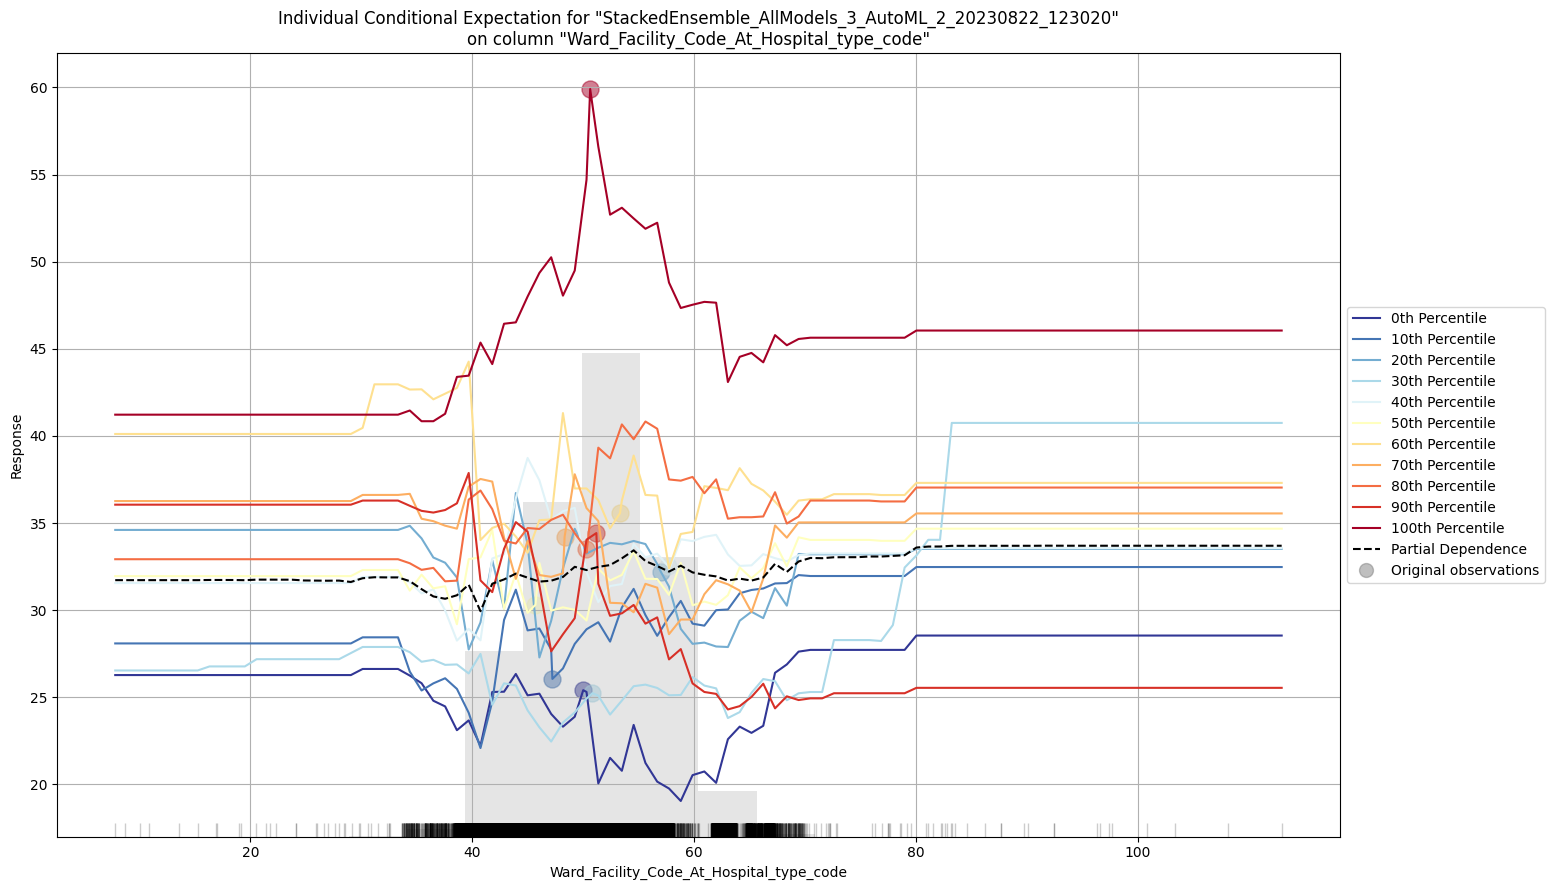

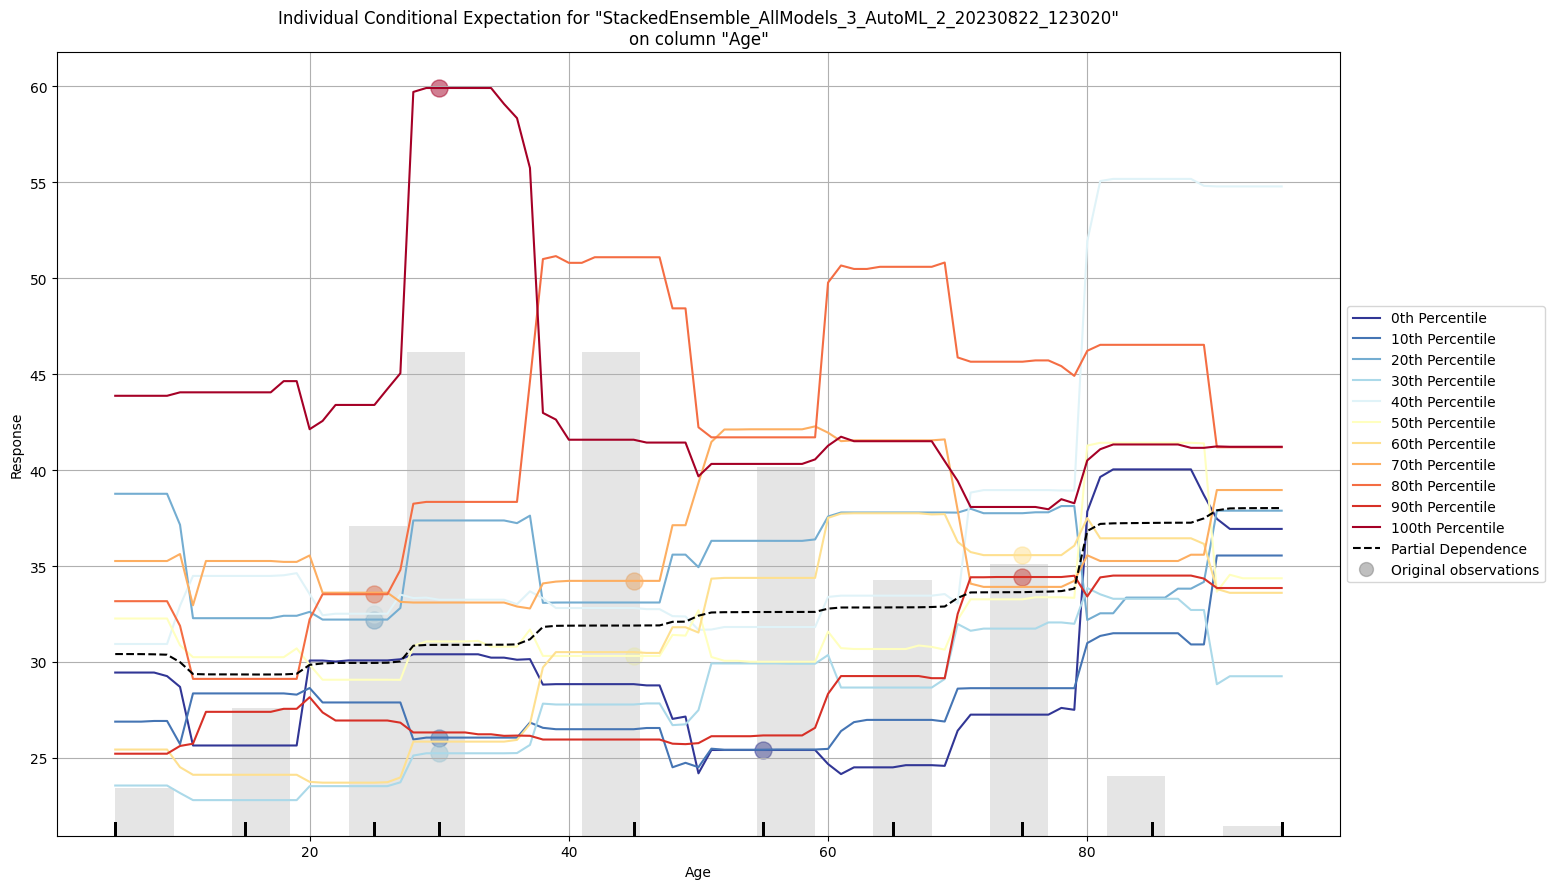

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_2_20230822_123020,15.4948,240.09,11.3732,0.529263,240.09,11027,0.002121,DRF
StackedEnsemble_AllModels_3_AutoML_2_20230822_123020,16.1454,260.673,11.9124,0.544801,260.673,2867,0.013683,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20230822_123020,16.2075,262.684,11.9463,0.546167,262.684,1086,0.014098,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20230822_123020,16.2341,263.546,11.9797,0.547252,263.546,1439,0.007321,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20230822_123020,16.3613,267.691,12.0837,0.550833,267.691,1302,0.034935,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20230822_123020,16.4009,268.989,12.1089,0.551312,268.989,1078,0.013846,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20230822_123020,16.4736,271.381,12.1726,0.553727,271.381,831,0.012149,StackedEnsemble
XRT_1_AutoML_2_20230822_123020,17.1457,293.973,12.6832,0.572643,293.973,7549,0.001681,DRF
XGBoost_1_AutoML_2_20230822_123020,17.5228,307.048,12.9965,nan,307.048,13314,0.00156,XGBoost
XGBoost_grid_1_AutoML_2_20230822_123020_model_2,17.8377,318.183,13.1517,0.587765,318.183,10280,0.001172,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [9]:
aml.explain(df)